In [4]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
geneva = pd.read_csv('./data/output/geneva_matchup_skin_meteo.csv')
geneva = geneva.sort_values(by='x')
geneva.dtypes

x                    int64
y                  float64
y1                 float64
y4                   int64
air_temp           float64
rel_humidity       float64
sol_irr            float64
wind_speed         float64
rainfall           float64
air_pressure       float64
meteo_timestamp    float64
skin_datetime       object
meteo_datetime      object
dtype: object

In [6]:
geneva

,x,y,y1,y4,air_temp,rel_humidity,sol_irr,wind_speed,rainfall,air_pressure,meteo_timestamp,skin_datetime,meteo_datetime
22187,1646708700,5.30,NaN,1,1.322833,64.122500,0.001,1.237667,0.0,975.0,1.646708e+09,2022-03-08 04:05:00,2022-03-08 04:00:00
22188,1646709000,5.59,NaN,1,1.264750,64.343333,0.001,1.283167,0.0,975.0,1.646709e+09,2022-03-08 04:10:00,2022-03-08 04:10:00
22189,1646709300,5.49,NaN,1,1.264750,64.343333,0.001,1.283167,0.0,975.0,1.646709e+09,2022-03-08 04:15:00,2022-03-08 04:10:00
22190,1646709600,5.54,NaN,1,1.192750,64.585833,0.001,1.309833,0.0,975.0,1.646710e+09,2022-03-08 04:20:00,2022-03-08 04:20:00
22191,1646709900,5.51,NaN,1,1.192750,64.585833,0.001,1.309833,0.0,975.0,1.646710e+09,2022-03-08 04:25:00,2022-03-08 04:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46634,1679474700,9.18,-60.6,0,8.779167,78.741667,501.650,1.337667,0.0,973.0,1.679474e+09,2023-03-22 09:45:00,2023-03-22 09:40:00
46635,1679475000,9.28,-62.1,0,8.781667,77.756667,526.875,1.387500,0.0,973.0,1.679475e+09,2023-03-22 09:50:00,2023-03-22 09:50:00
46636,1679475300,9.20,-62.3,0,8.781667,77.756667,526.875,1.387500,0.0,973.0,1.679475e+09,2023-03-22 09:55:00,2023-03-22 09:50:00
46637,1679475600,9.12,-62.8,0,8.845000,76.536667,553.775,1.414500,0.0,973.0,1.679476e+09,2023-03-22 10:00:00,2023-03-22 10:00:00


In [7]:
#geneva.head
#geneva.dtypes
#geneva.describe()
#geneva.query('y.isna()')

In [8]:
geneva.memory_usage(deep=True).sum()

12566656

In [9]:
geneva.drop(['y4'], axis=1).select_dtypes('float64').describe()

,y,y1,air_temp,rel_humidity,sol_irr,wind_speed,rainfall,air_pressure,meteo_timestamp
count,49406.000000,791.000000,50672.000000,50672.000000,50672.000000,50672.000000,50672.000000,50672.000000,5.067200e+04
mean,17.178217,-58.680278,17.173372,64.186952,232.061030,2.500229,0.014366,973.769117,1.654971e+09
std,7.166455,16.718498,6.726839,13.535866,282.297636,1.952797,0.364421,9.051168,6.347778e+06
min,4.840000,-85.500000,0.558750,19.808333,0.000750,0.075000,0.000000,654.409333,1.646708e+09
25%,10.070000,-70.000000,11.216667,55.870208,0.001167,1.215583,0.000000,971.000000,1.650503e+09
50%,17.990000,-62.800000,18.319583,64.628333,76.256292,1.796042,0.000000,975.000000,1.654302e+09
75%,22.850000,-52.200000,22.464167,73.617500,450.935417,3.123750,0.000000,977.583333,1.658101e+09
max,36.830000,-6.500000,34.135833,98.333333,908.916667,12.381667,16.350000,988.083333,1.679476e+09


In [10]:
gplot = (
    geneva
    .assign(meteo_timestamp= lambda x: 10000* x.meteo_timestamp)
    .astype({'meteo_timestamp': 'int64'})
    .drop(['y4'], axis=1)
    .sort_values(by='x')
    )
gplot.to_csv('/Users/olbu/Documents/uni/FS_23/WASY/project_code/data/output/geneva_lex_skin_meteo.csv')

Text(0.5, 0, 'Timestamp')

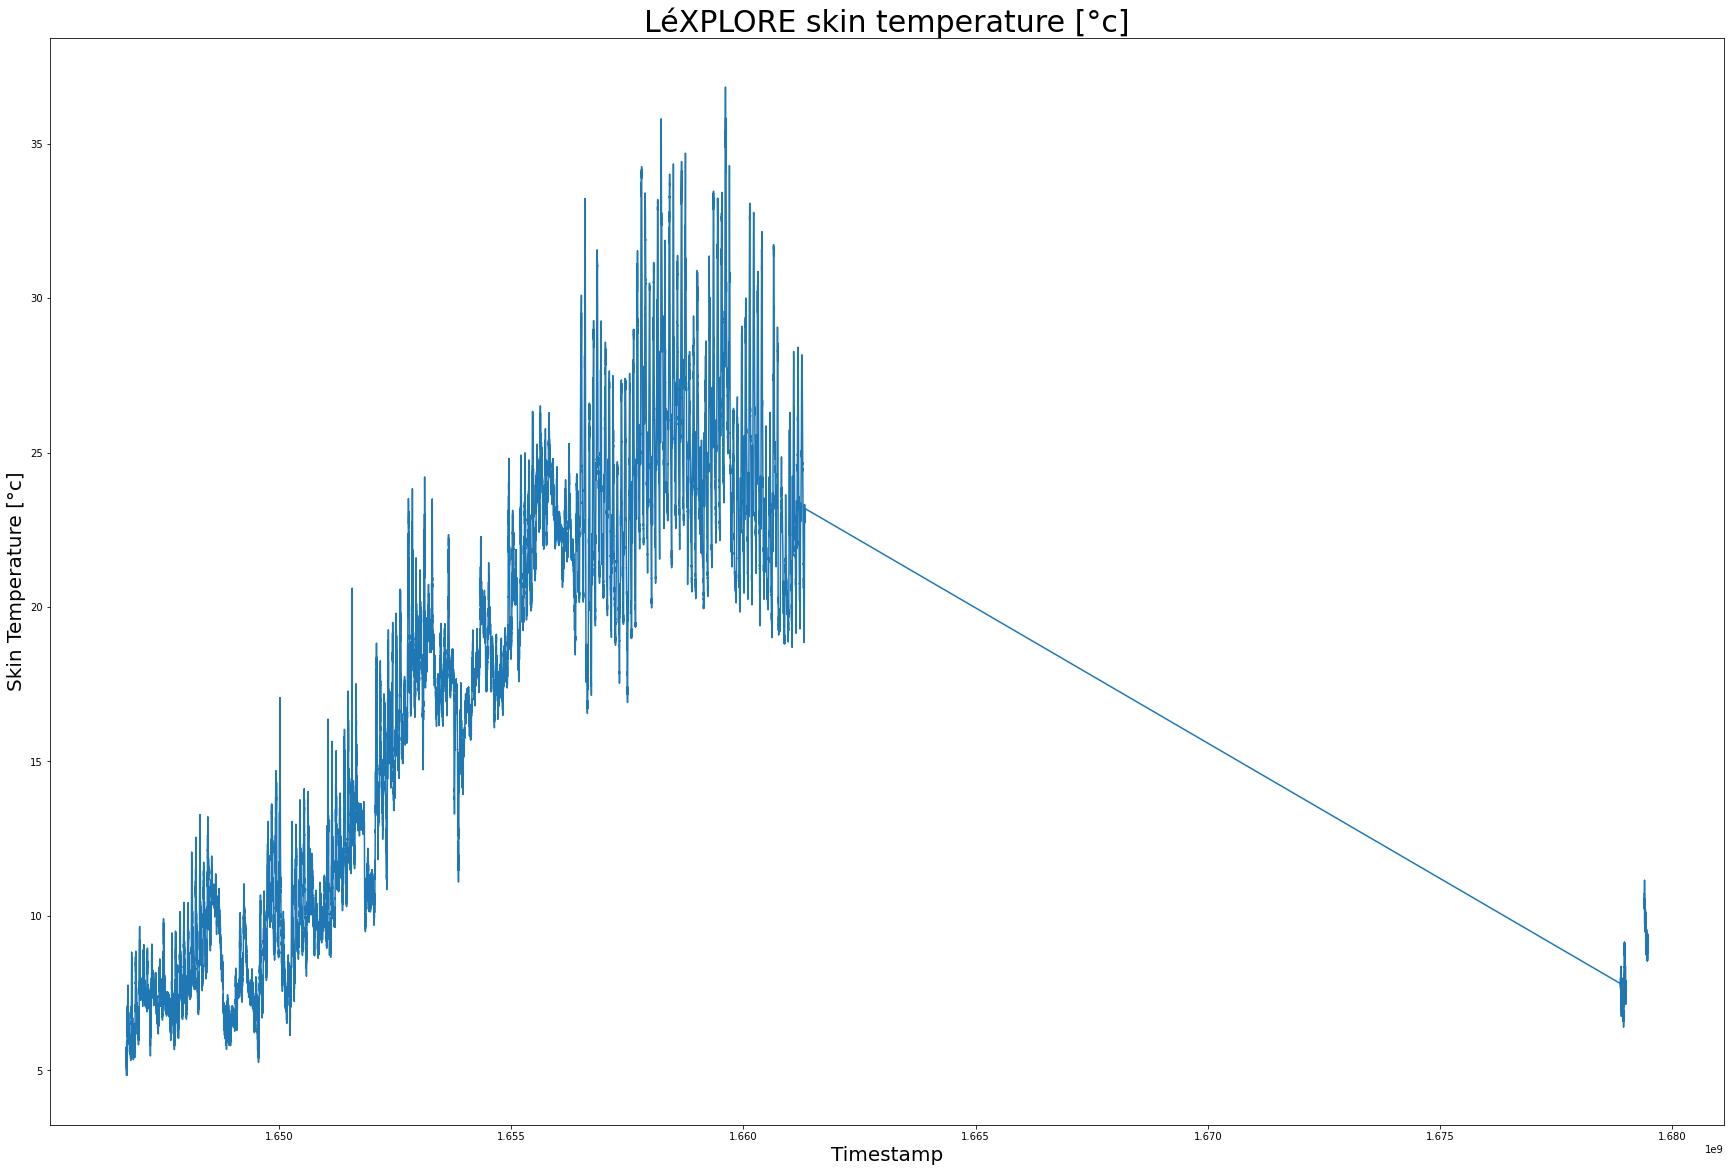

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)
plt.plot(gplot.x, gplot.y)
plt.title("LéXPLORE skin temperature [°c]", fontsize = 30)
plt.ylabel("Skin Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)


Text(0.5, 0, 'Timestamp')

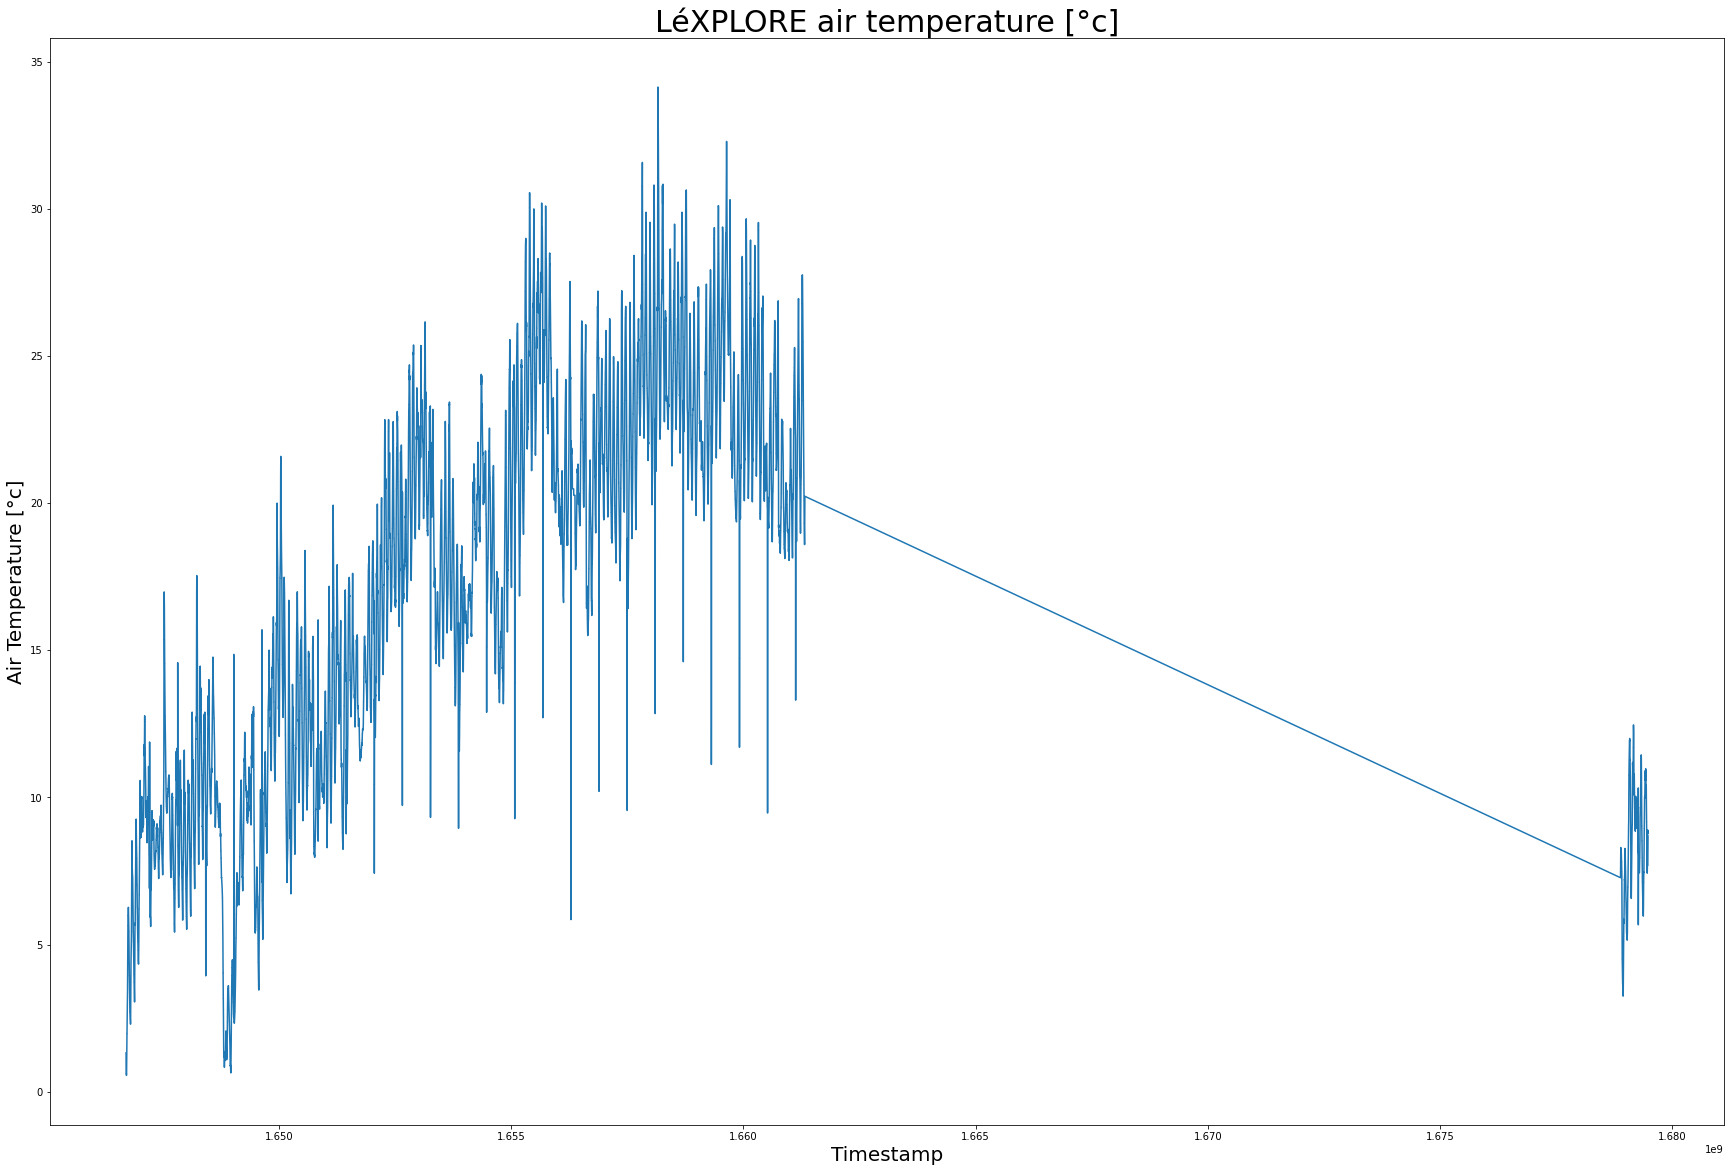

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)
plt.plot(gplot.x, gplot.air_temp)
plt.title("LéXPLORE air temperature [°c]", fontsize = 30)
plt.ylabel("Air Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)


Text(0.5, 0, 'Timestamp')

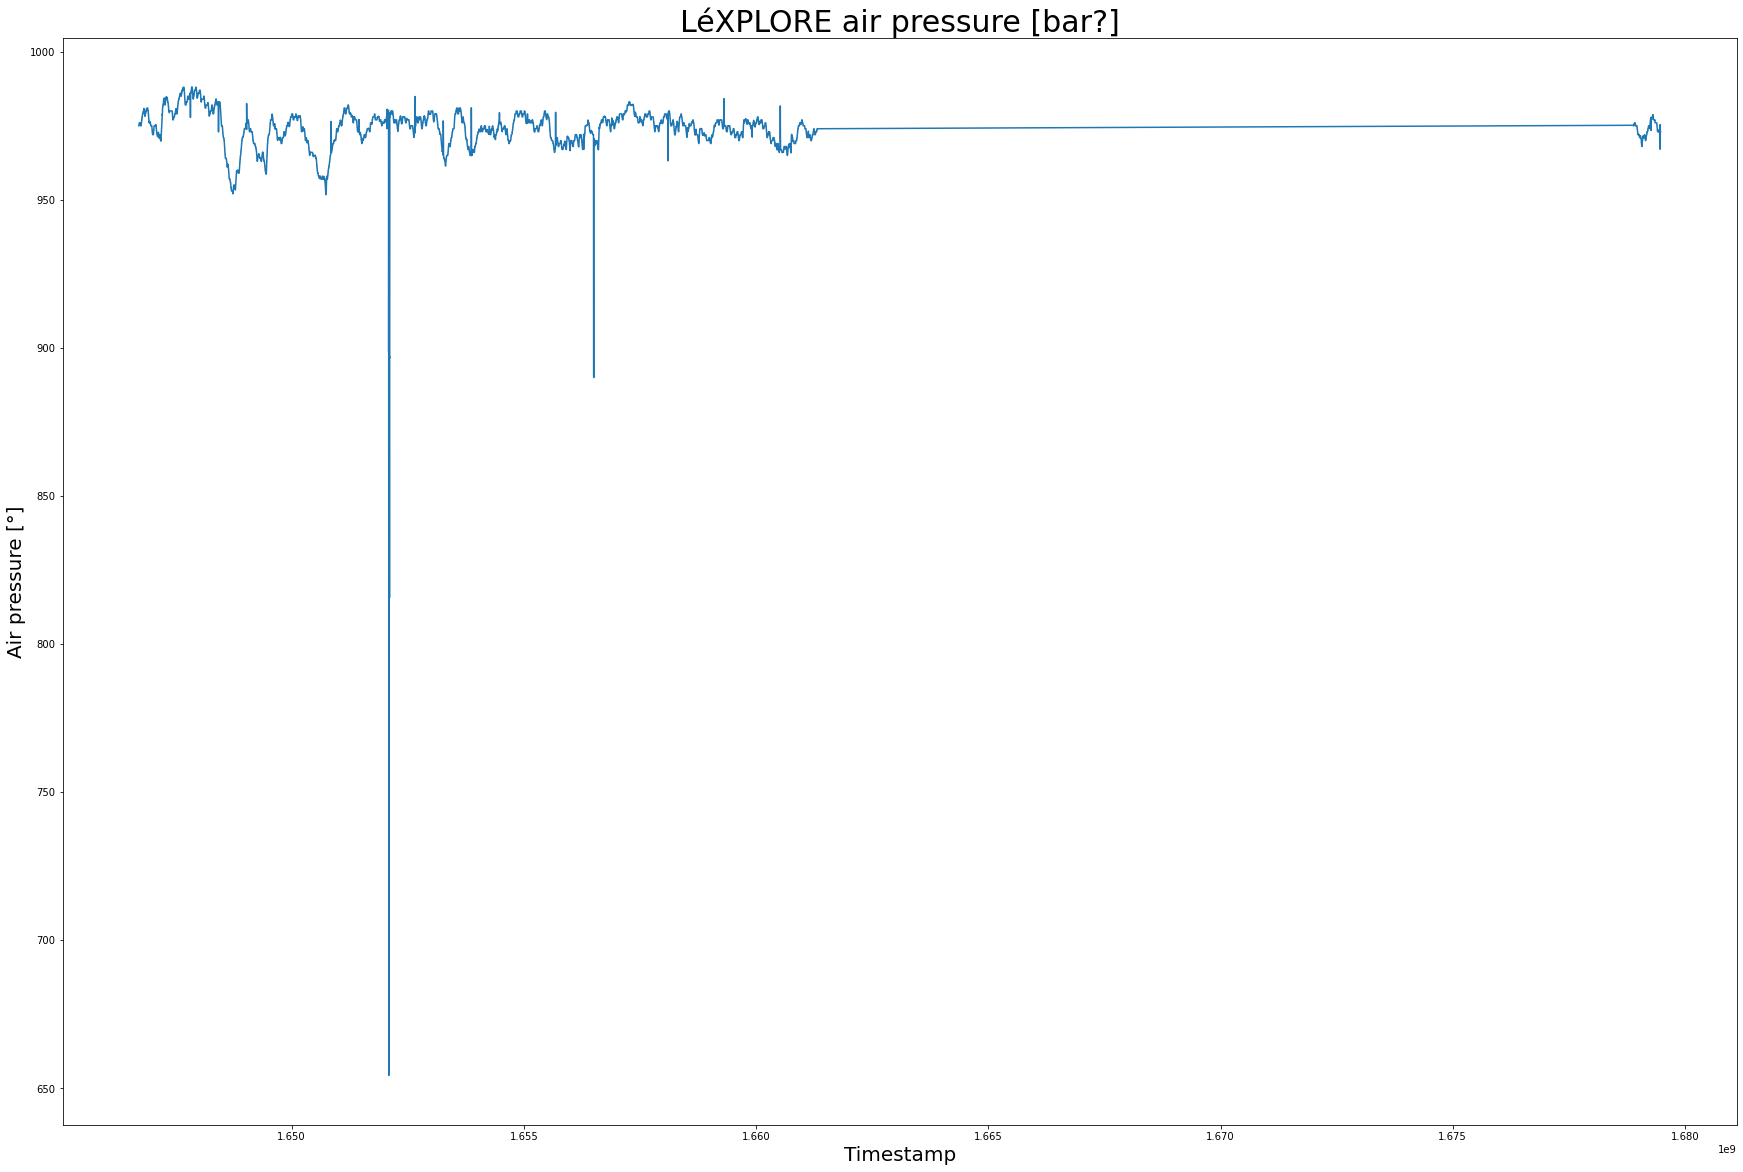

In [13]:
plt.plot(gplot.x, gplot.air_pressure)
plt.title("LéXPLORE air pressure [bar?]", fontsize = 30)
plt.ylabel("Air pressure [°]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

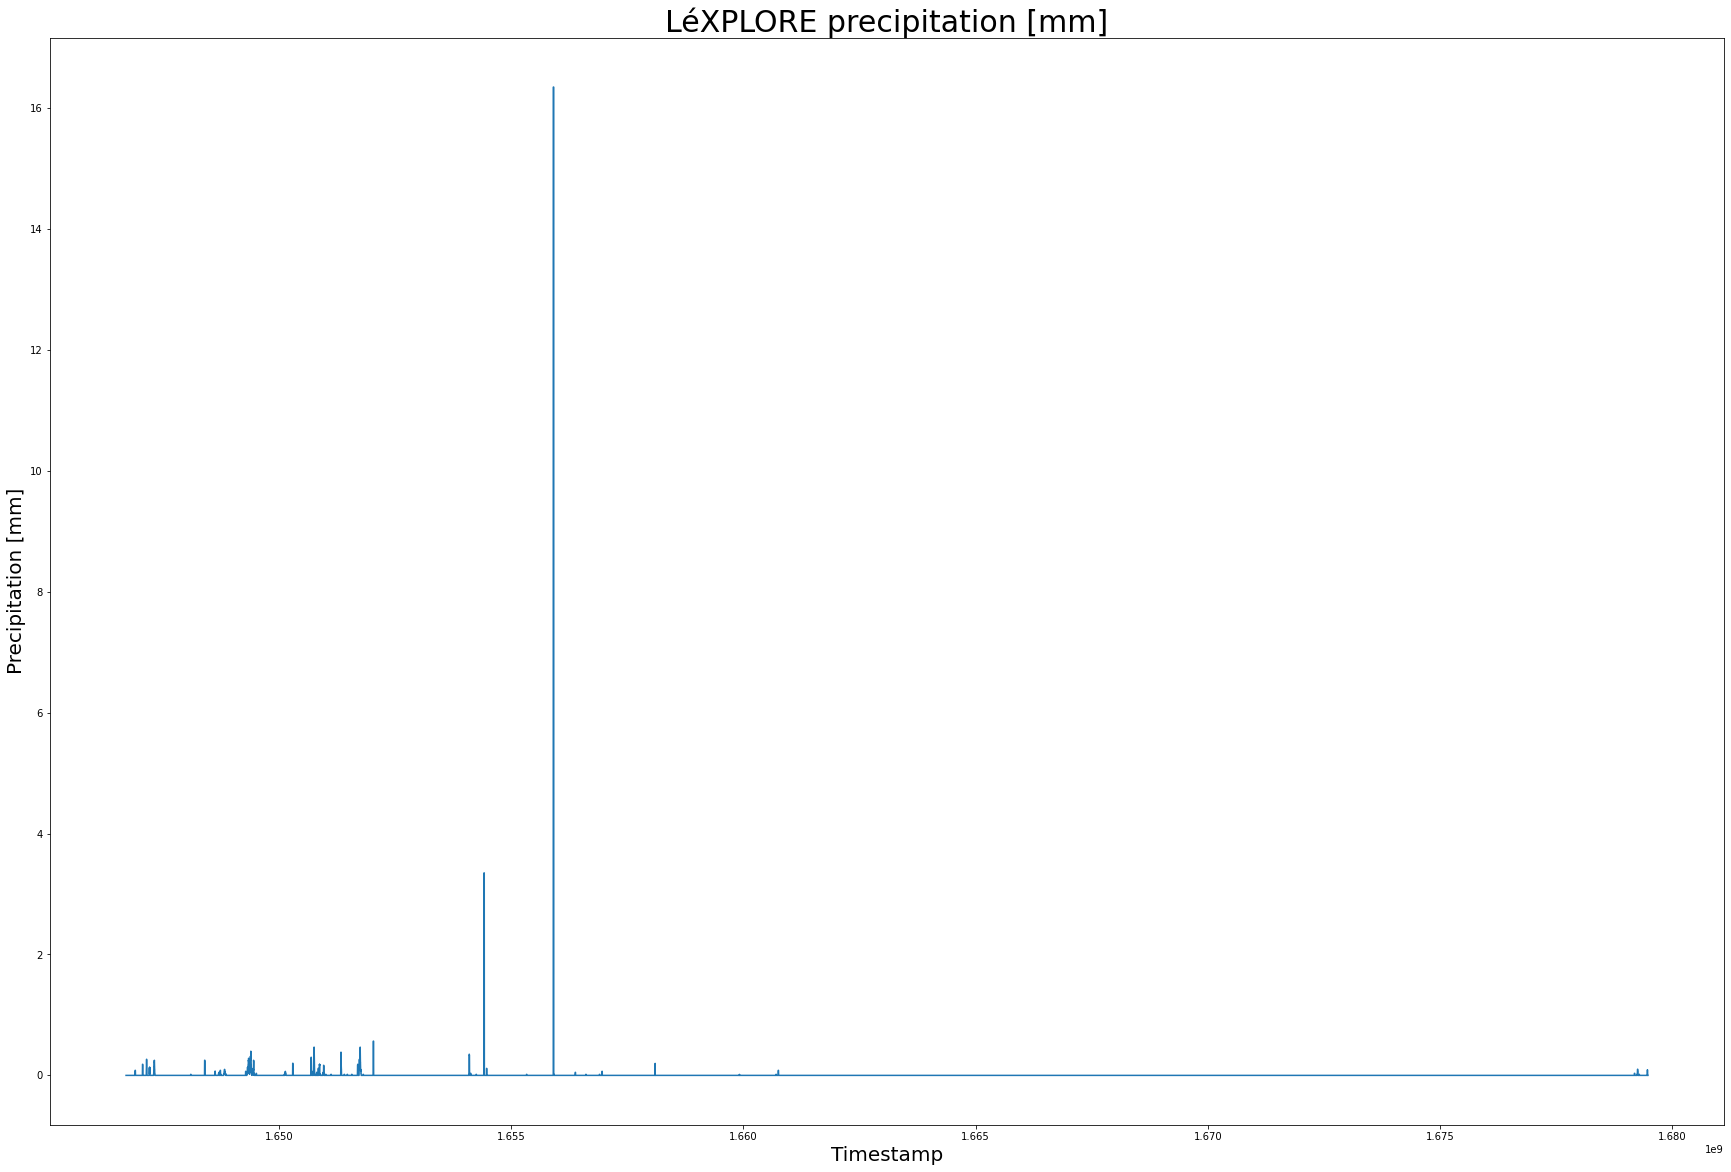

In [14]:
plt.plot(gplot.x, gplot.rainfall)
plt.title("LéXPLORE precipitation [mm]", fontsize = 30)
plt.ylabel("Precipitation [mm]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

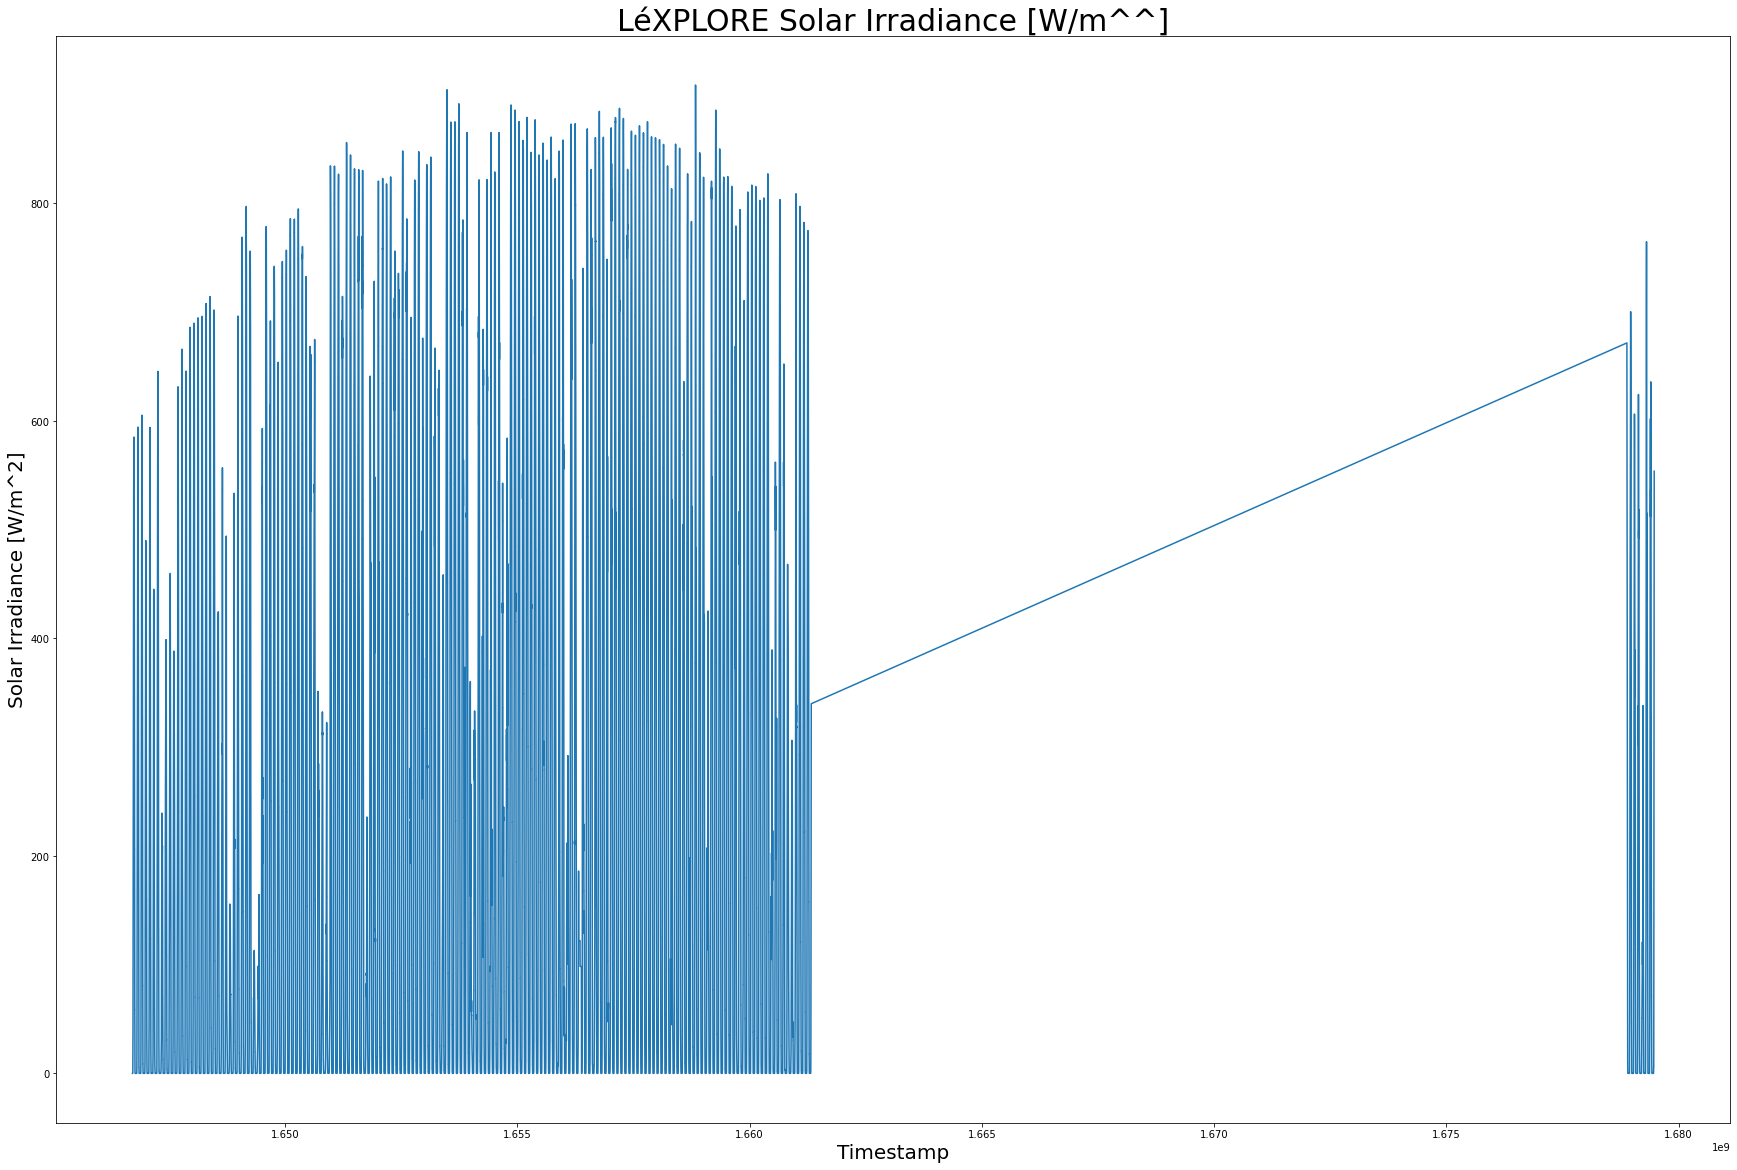

In [15]:
plt.plot(gplot.x, gplot.sol_irr)
plt.title("LéXPLORE Solar Irradiance [W/m^^]", fontsize = 30)
plt.ylabel("Solar Irradiance [W/m^2]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

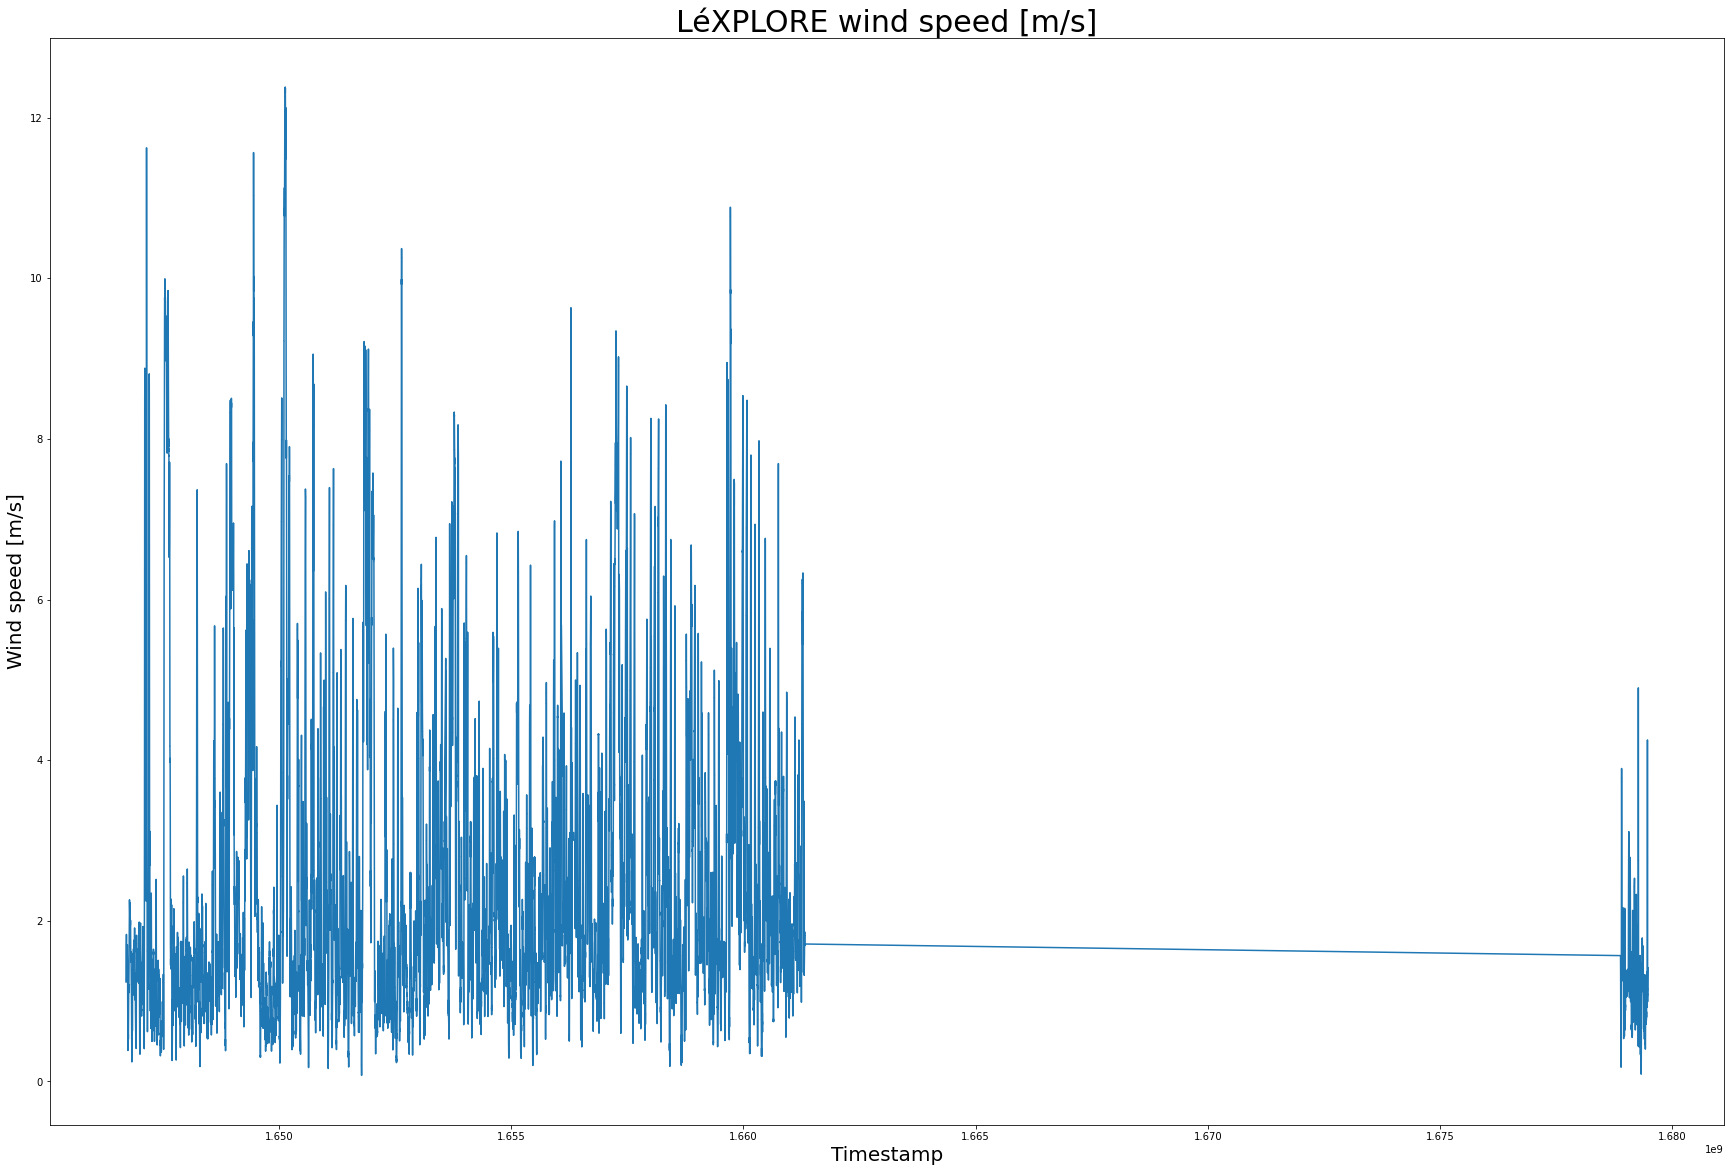

In [16]:
plt.plot(gplot.x, gplot.wind_speed)
plt.title("LéXPLORE wind speed [m/s]", fontsize = 30)
plt.ylabel("Wind speed [m/s]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

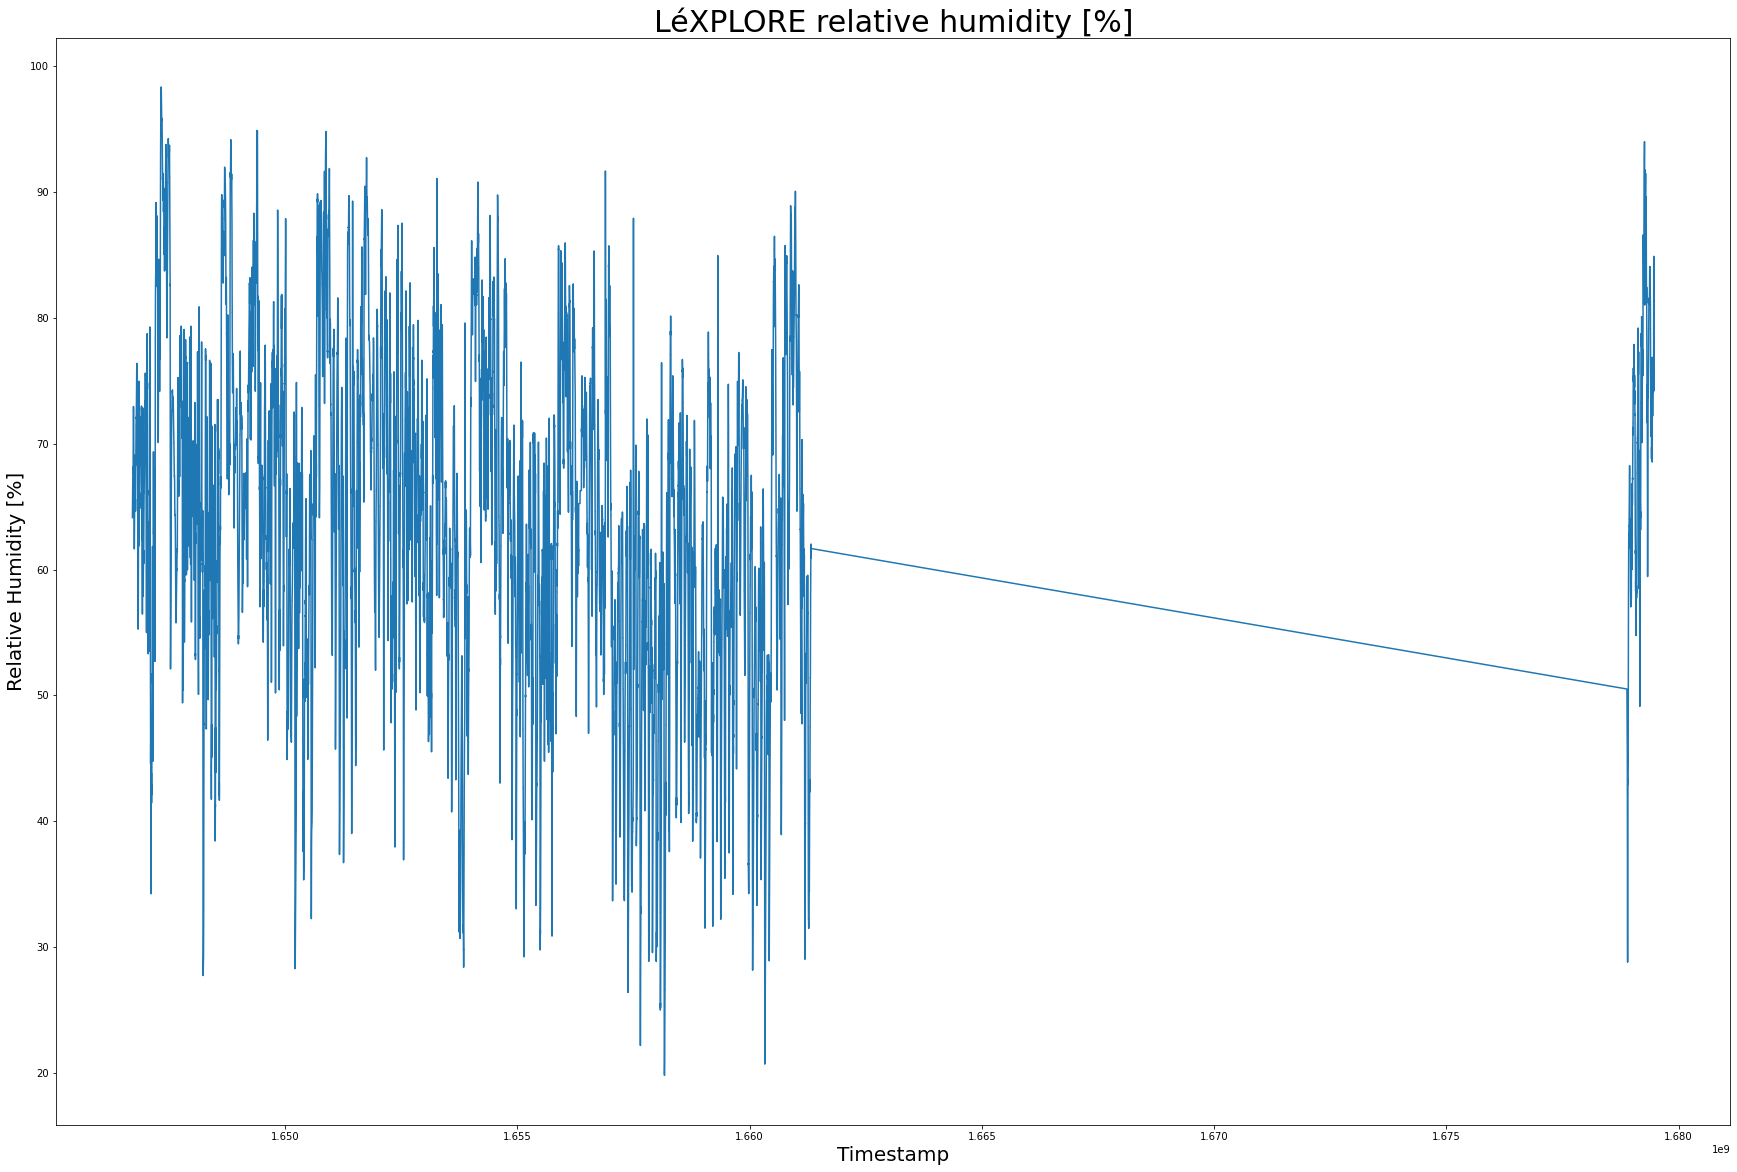

In [17]:
plt.plot(gplot.x, gplot.rel_humidity)
plt.title("LéXPLORE relative humidity [%]", fontsize = 30)
plt.ylabel("Relative Humidity [%]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

In [18]:
###AEGERI

aegeri = pd.read_csv('./data/output/aegeri_matchup_skin_meteo.csv')
aegeri.sort_values(by='x',).dtypes

x                    int64
y                  float64
y1                 float64
air_temp           float64
wind_speed         float64
air_pressure       float64
rel_humidity       float64
sol_irr            float64
meteo_timestamp    float64
skin_datetime       object
meteo_datetime      object
dtype: object

Text(0.5, 0, 'Timestamp')

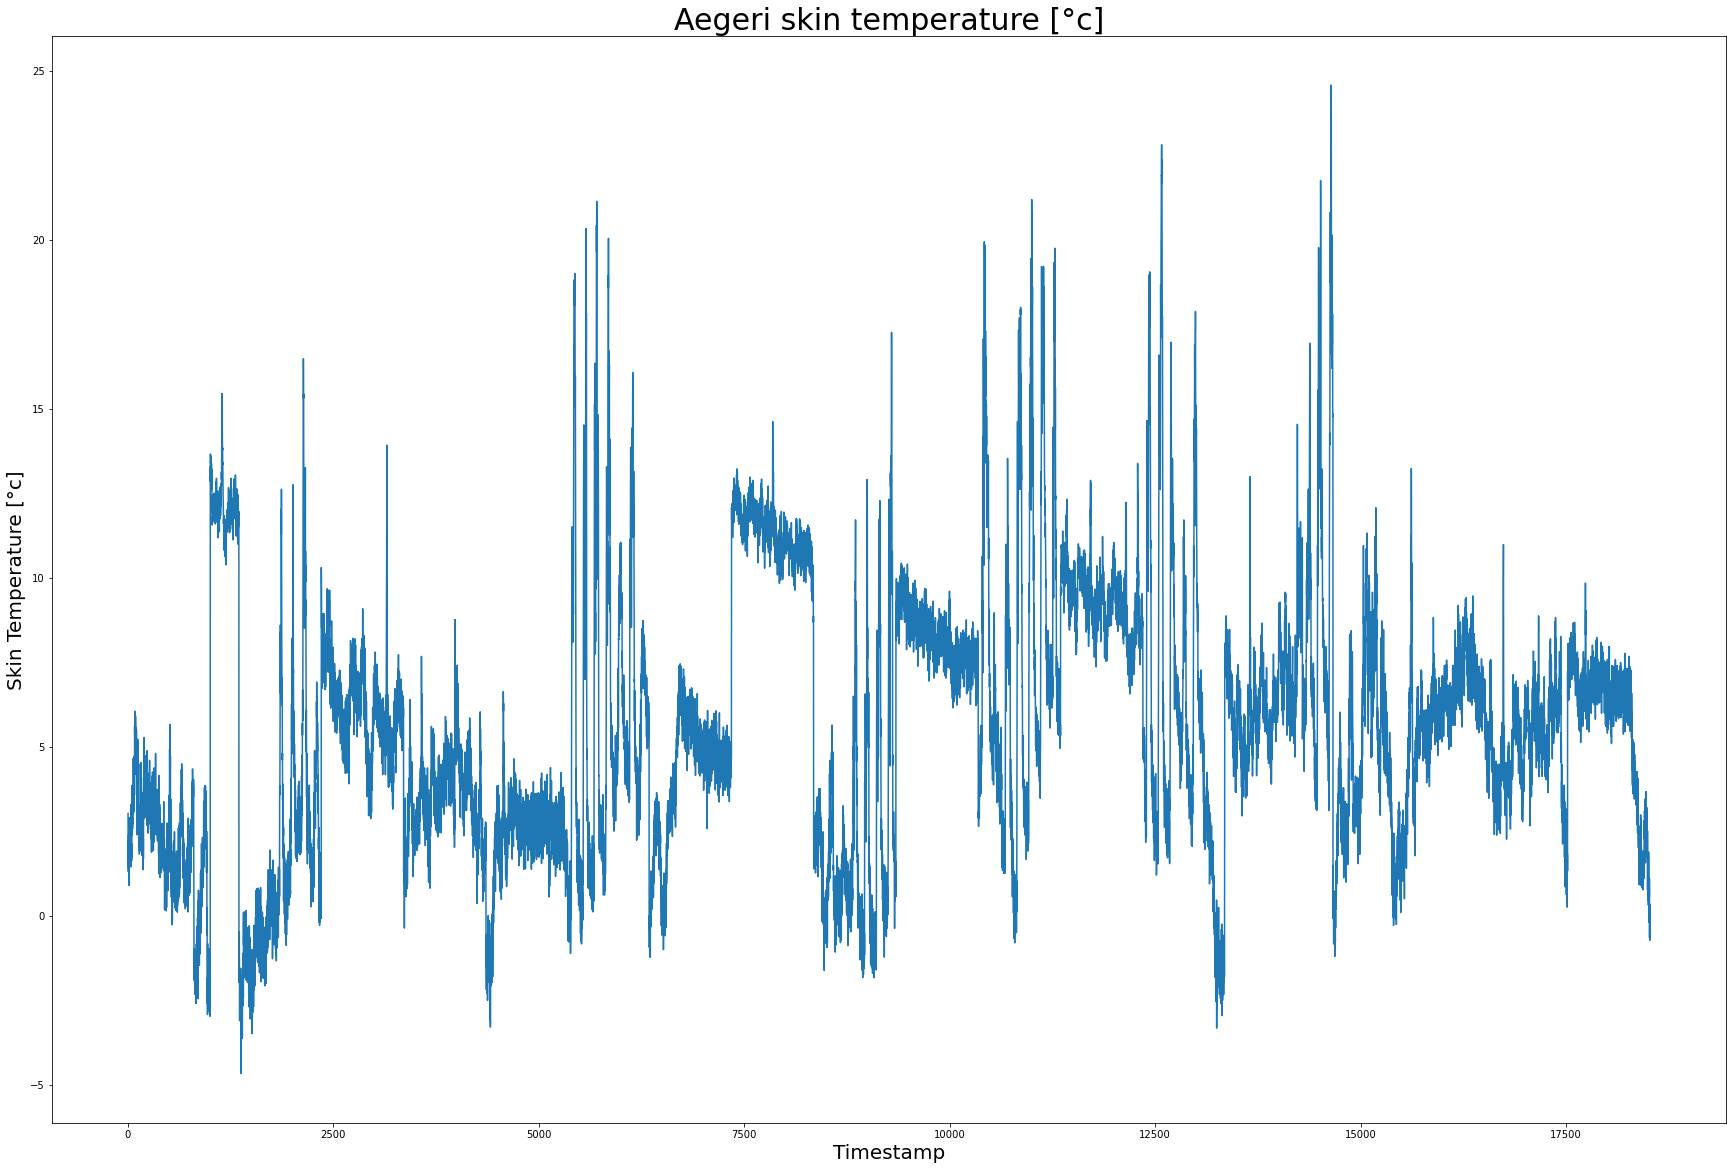

In [19]:
plt.plot(aegeri.y)
plt.title("Aegeri skin temperature [°c]", fontsize = 30)
plt.ylabel("Skin Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

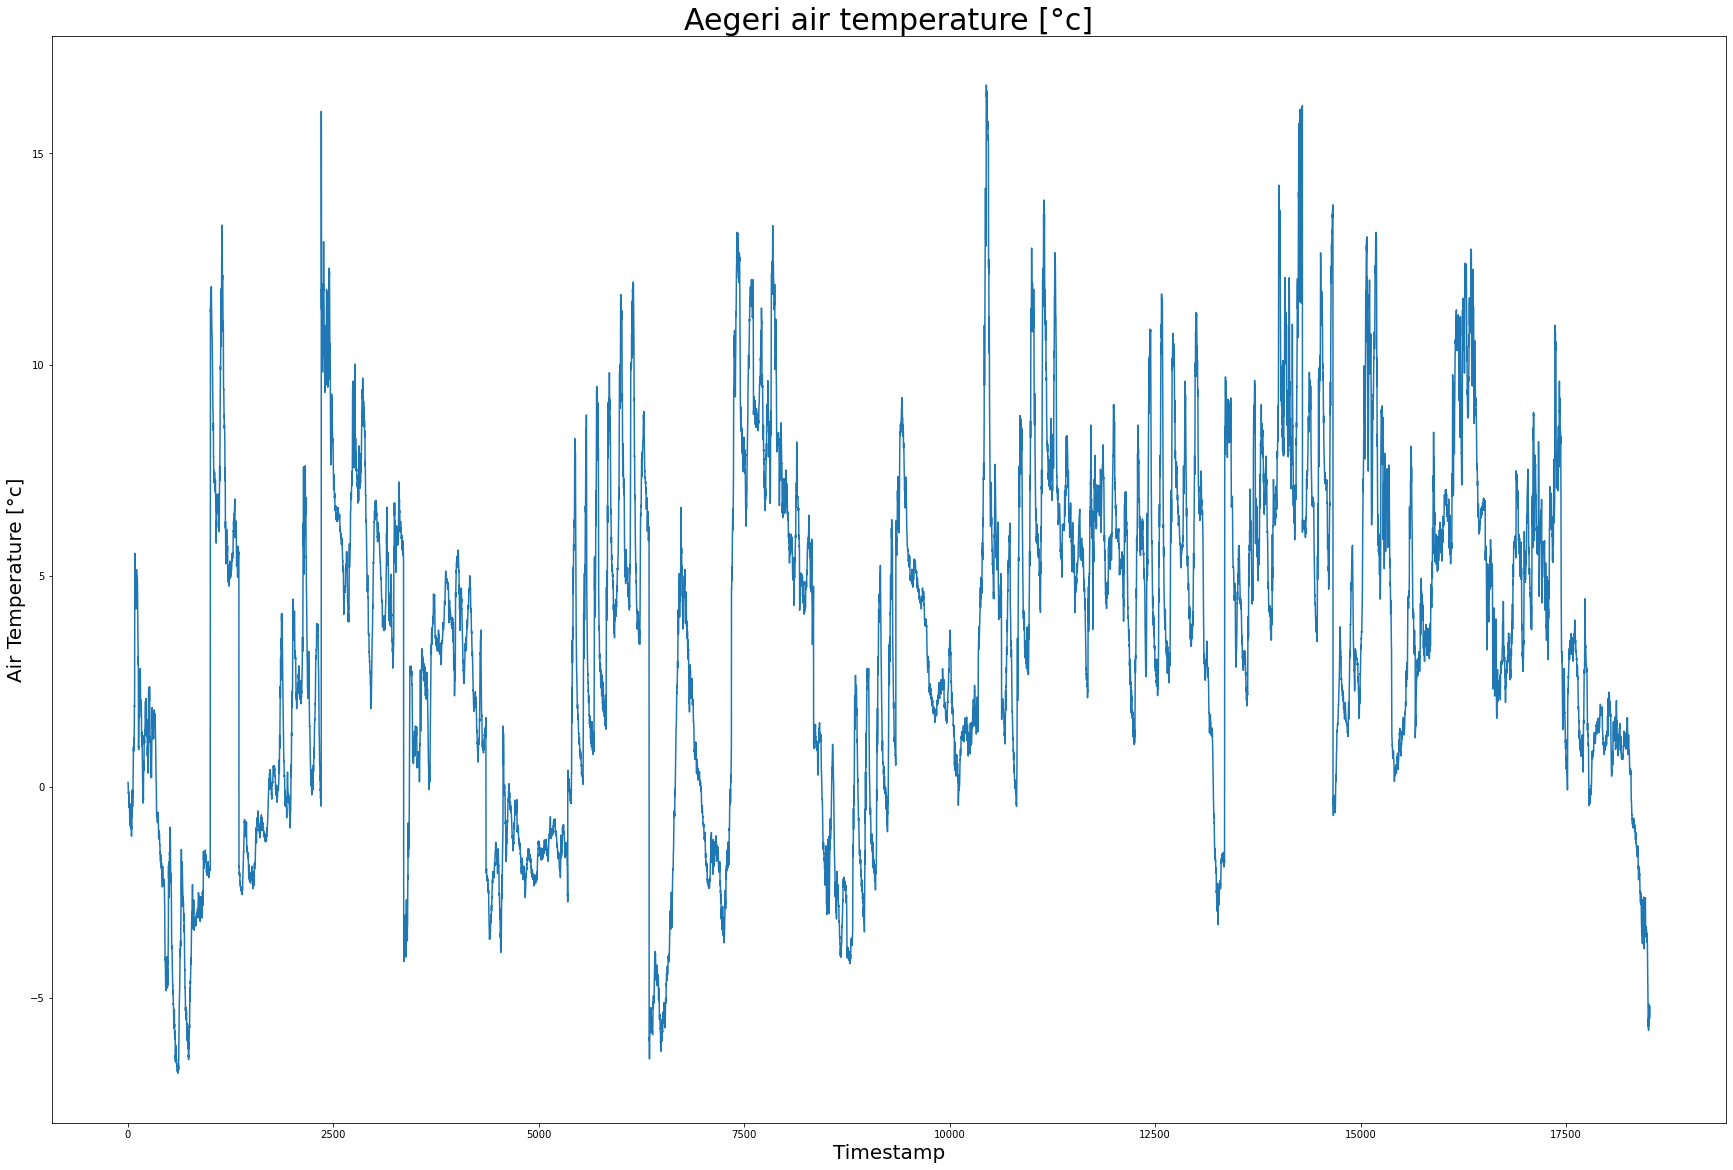

In [20]:
plt.plot(aegeri.air_temp)
plt.title("Aegeri air temperature [°c]", fontsize = 30)
plt.ylabel("Air Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

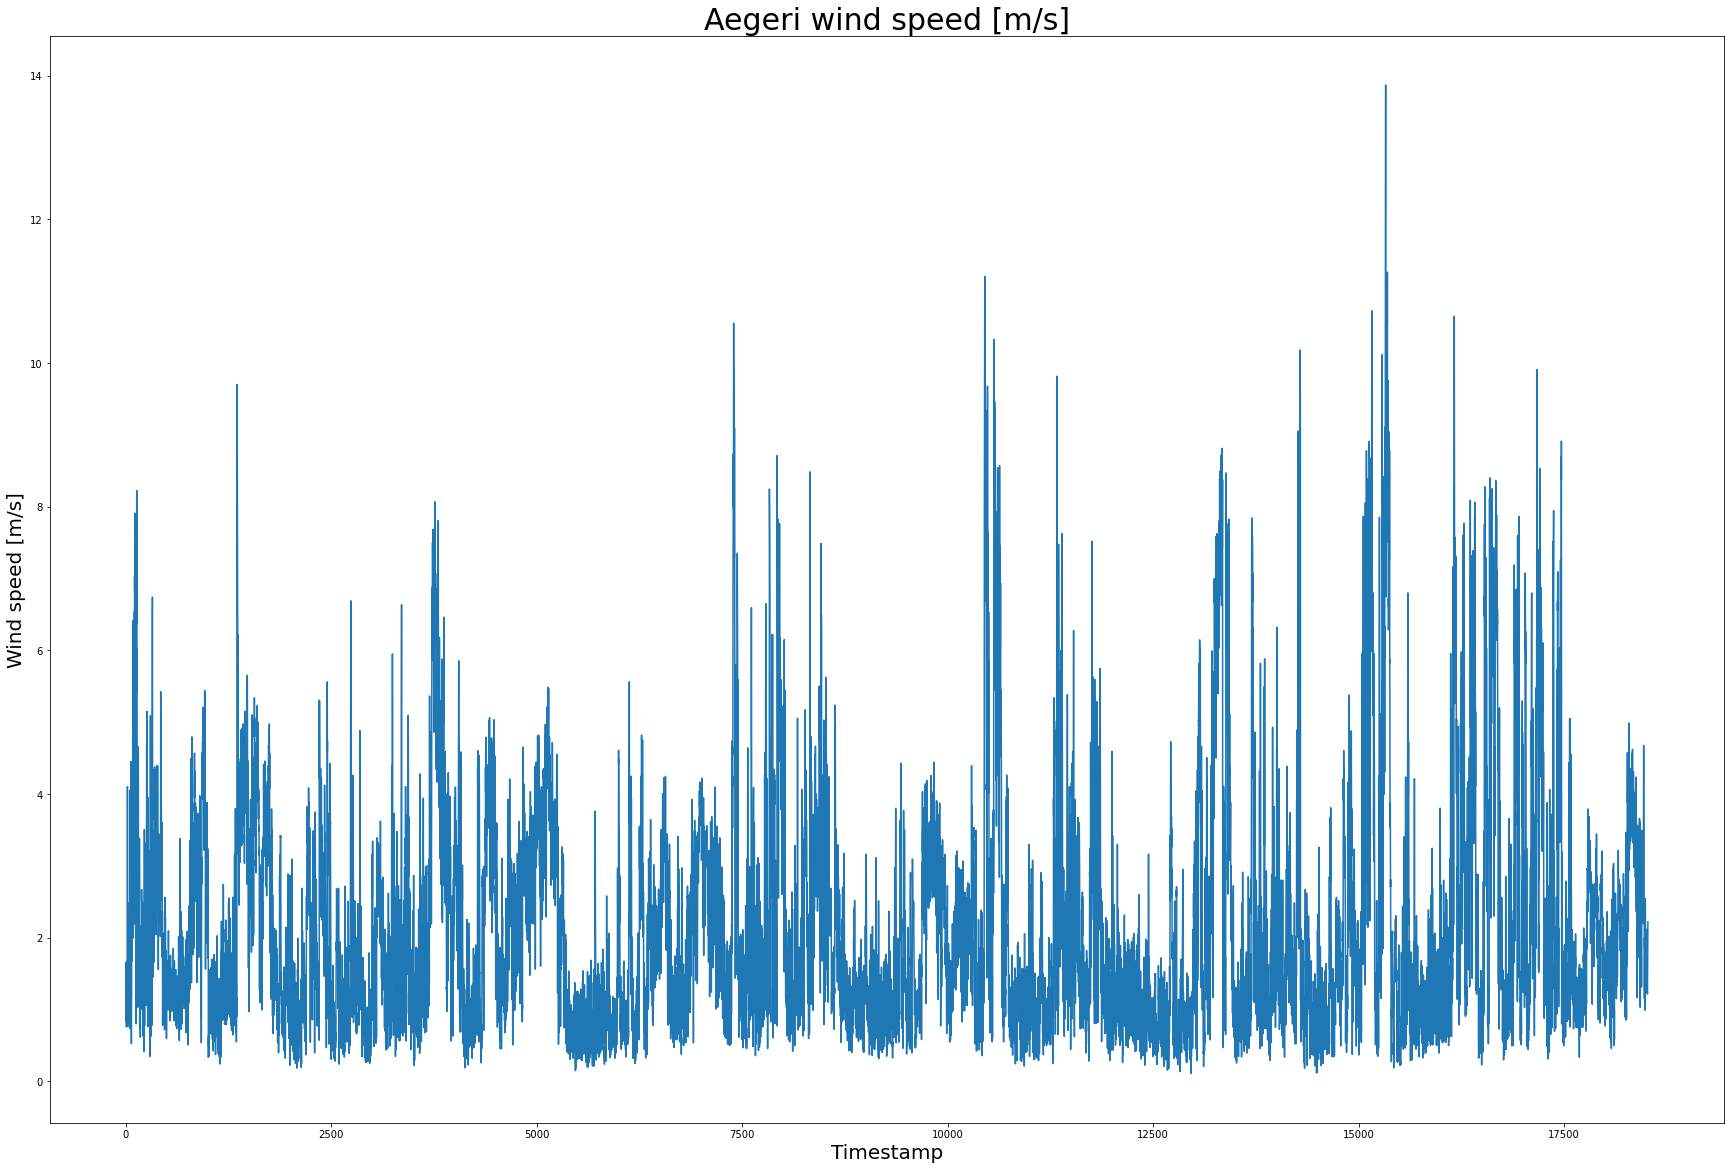

In [21]:
plt.plot(aegeri.wind_speed)
plt.title("Aegeri wind speed [m/s]", fontsize = 30)
plt.ylabel("Wind speed [m/s]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

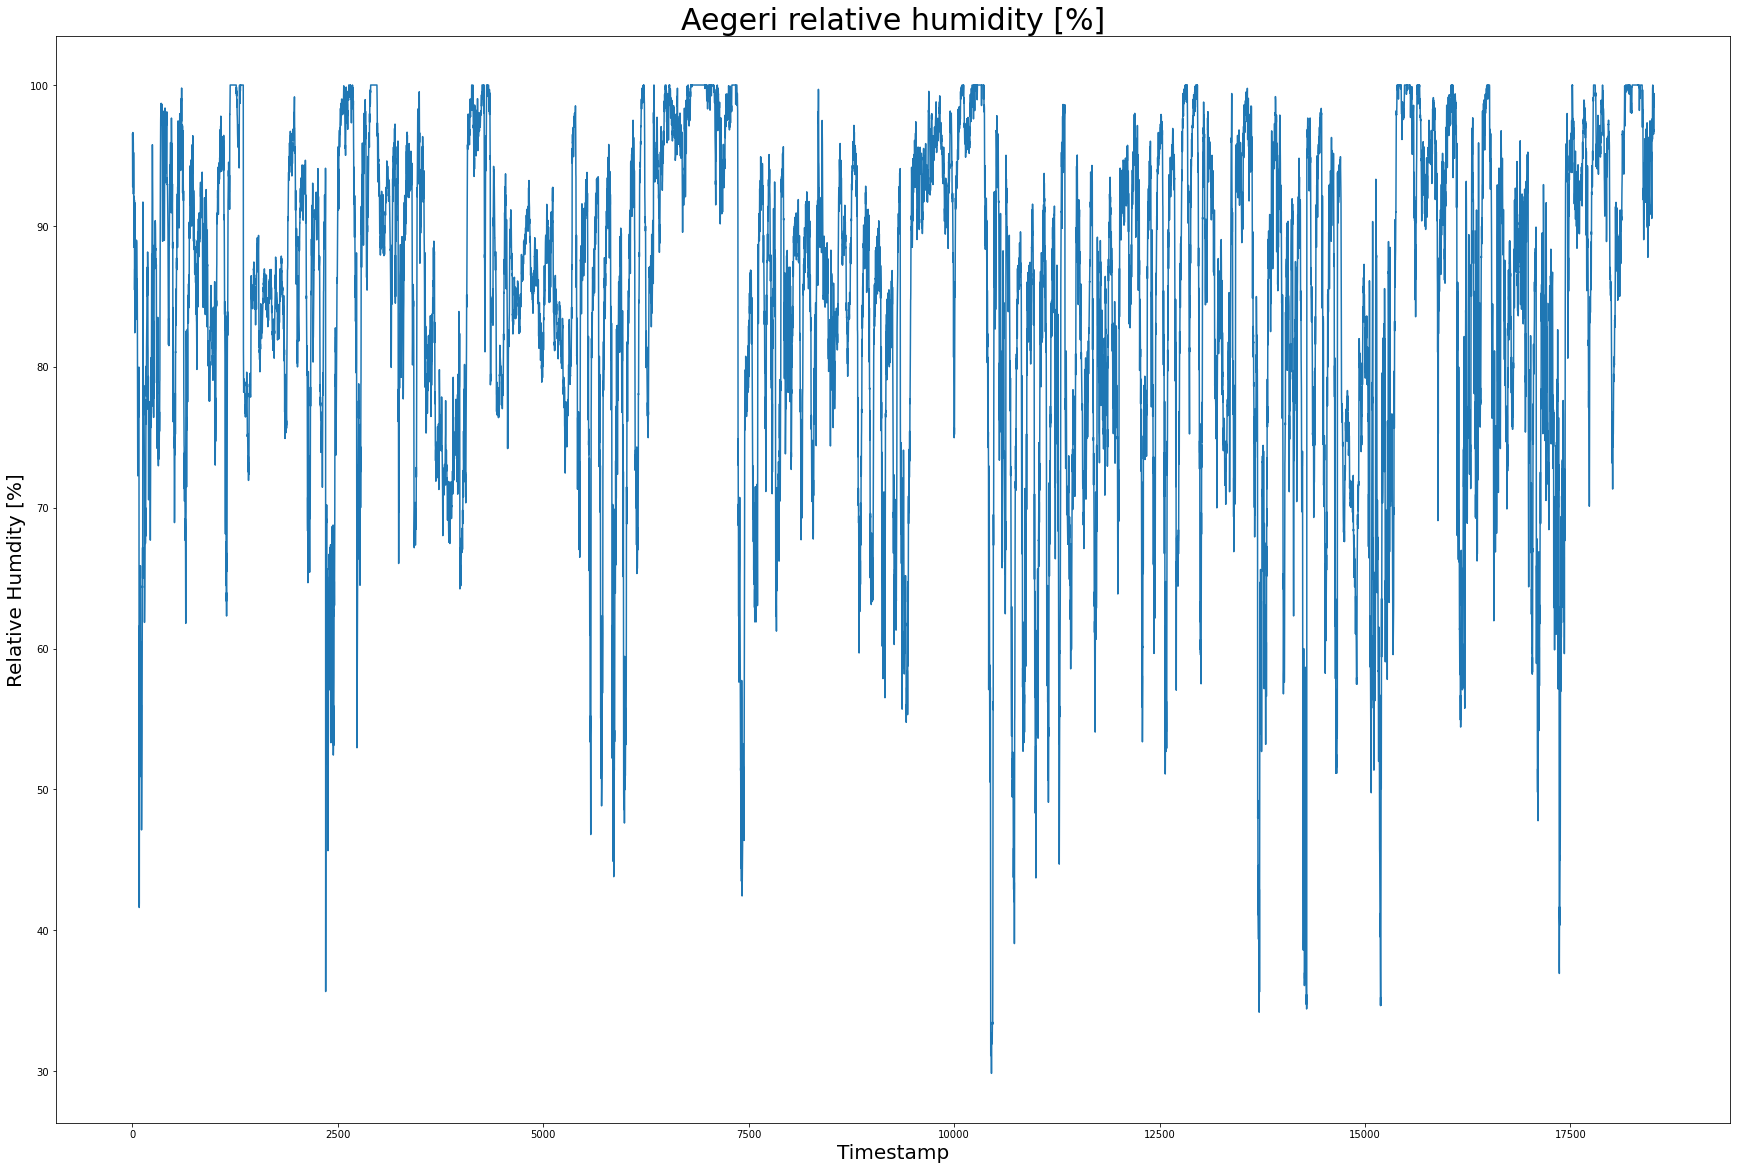

In [22]:
plt.plot(aegeri.rel_humidity)
plt.title("Aegeri relative humidity [%]", fontsize = 30)
plt.ylabel("Relative Humdity [%]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

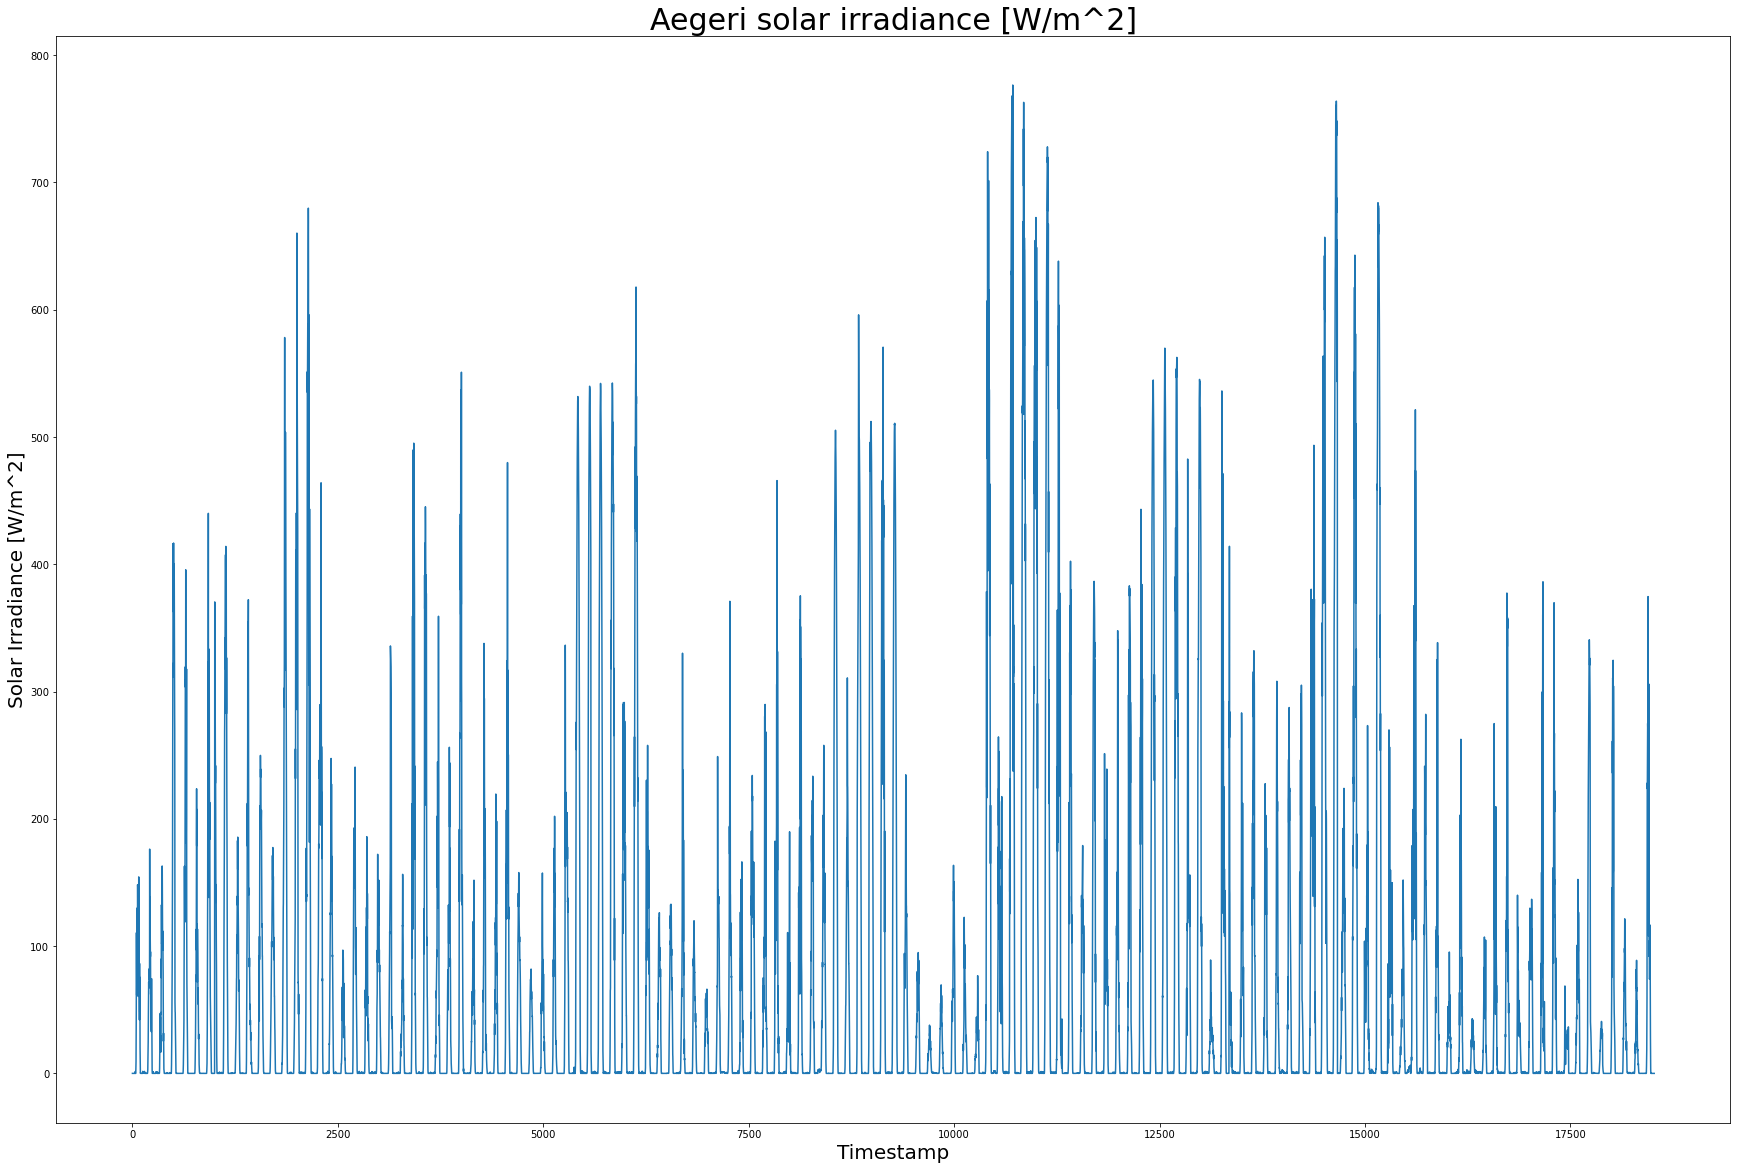

In [23]:
plt.plot(aegeri.sol_irr)
plt.title("Aegeri solar irradiance [W/m^2]", fontsize = 30)
plt.ylabel("Solar Irradiance [W/m^2]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)